In [2]:
#import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#to partition data
from sklearn.model_selection import train_test_split

In [4]:
#library for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [5]:
#import performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
income_data=pd.read_csv('adult.csv')

In [7]:
income=income_data.copy()

In [9]:
income.info() #to check data type of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#check for missing values
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
#get the summary statistics of numerical data
summary_num=income.describe()
print(summary_num)

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [16]:
#get summary statistics of categorical data
summary_cat=income.describe(include='O')
print(summary_cat)

       workclass education      marital.status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native.country income  
count   32561  32561          32561  32561  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720  


In [21]:
#frequency of categorical variables
income['workclass'].value_counts()
income['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
#check for unique classes
print(income['workclass'].unique()  )
print(np.unique(income['occupation']))

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [98]:
data=pd.read_csv('adult.csv', na_values=['?'])

# Data pre-processing

In [99]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [100]:
missing=data[data.isnull().any(axis=1)]
missing.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [102]:
data1=data.dropna(axis=0) #removing rows 

In [103]:
#relationship between independent variables
correlation=data1.corr()
correlation

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


# Cross-table and Data visualization (as there is no relationship between numerical variables)

In [37]:
#extract column names
data1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [39]:
gender=pd.crosstab(index=data1['sex'],
                  #normalize=True,
                  columns='count')
print(gender)

col_0   count
sex          
Female   9782
Male    20380


In [40]:
#by setting normalize parameter to True it gives proportion of values
gender=pd.crosstab(index=data1['sex'],
                  normalize=True,
                  columns='count')
print(gender)

col_0      count
sex             
Female  0.324315
Male    0.675685


In [41]:
#Sex vs Salary 
sex_sal=pd.crosstab(index=data1['sex'],
                   columns=data1['income'],
                   margins=True,
                   normalize='index')
print(sex_sal)

income     <=50K      >50K
sex                       
Female  0.886322  0.113678
Male    0.686163  0.313837
All     0.751078  0.248922


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

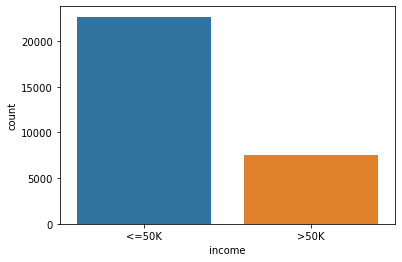

In [44]:
#Frequency distribution of income
sns.countplot(data1['income'])

In [48]:
#Histogram of Age
sns.distplot(data1['age'],bins=10, kde=False)

SyntaxError: invalid syntax (<ipython-input-48-ab5cb4f56fb7>, line 3)

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


income
<=50K    34
>50K     43
Name: age, dtype: int64

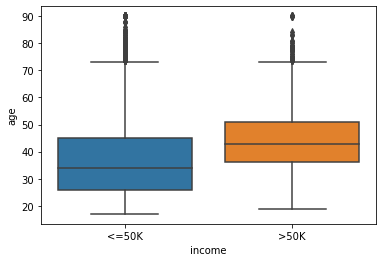

In [49]:
#Box plot: Age vs income
sns.boxplot('income','age',data=data1 )
data1.groupby('income')['age'].median()

In [51]:
data1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


<AxesSubplot:xlabel='count', ylabel='workclass'>

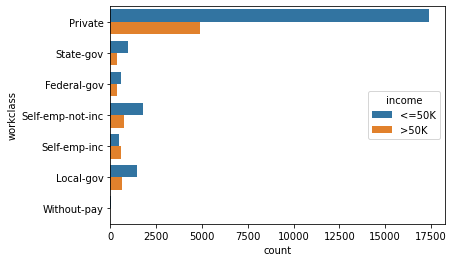

In [52]:
sns.countplot(y='workclass', data=data1, hue='income')

In [65]:
pd.crosstab(index=data1['workclass'],columns=data1['sex'], values=data1['hours.per.week'], aggfunc=np.mean).round(0)

sex,Female,Male
workclass,,
Federal-gov,40.0,42.0
Local-gov,39.0,42.0
Private,36.0,42.0
Self-emp-inc,42.0,50.0
Self-emp-not-inc,37.0,46.0
State-gov,37.0,40.0
Without-pay,29.0,35.0


In [66]:
pd.crosstab(index=data1['workclass'], columns=data1['income'])

income,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17410,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


<AxesSubplot:xlabel='count', ylabel='education'>

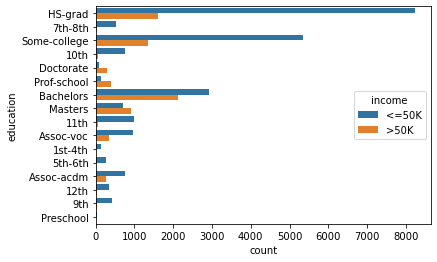

In [68]:
sns.countplot(y='education',data=data1, hue='income')

In [75]:
pd.crosstab(index=data1['education'], columns=data1['income'], margins=True, normalize='index')

income,<=50K,>50K
education,,
10th,0.928049,0.071951
11th,0.943702,0.056298
12th,0.923077,0.076923
1st-4th,0.960265,0.039735
5th-6th,0.958333,0.041667
7th-8th,0.937163,0.062837
9th,0.945055,0.054945
Assoc-acdm,0.746032,0.253968
Assoc-voc,0.736802,0.263198


<AxesSubplot:xlabel='count', ylabel='occupation'>

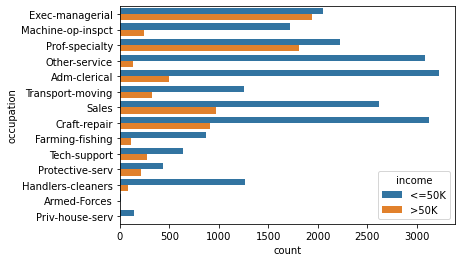

In [76]:
sns.countplot(y='occupation', data=data1, hue='income')

In [79]:
pd.crosstab(index=data1['occupation'], columns=data1['income'], normalize='index')

income,<=50K,>50K
occupation,,
Adm-clerical,0.866165,0.133835
Armed-Forces,0.888889,0.111111
Craft-repair,0.774690,0.225310
Exec-managerial,0.514780,0.485220
Farming-fishing,0.883721,0.116279
Handlers-cleaners,0.938519,0.061481
Machine-op-inspct,0.875381,0.124619
Other-service,0.958904,0.041096
Priv-house-serv,0.993007,0.006993


<AxesSubplot:xlabel='capital.gain'>

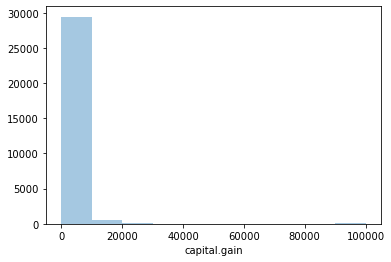

In [86]:
sns.distplot(data1['capital.gain'], kde=False, bins=10)

<AxesSubplot:xlabel='capital.loss'>

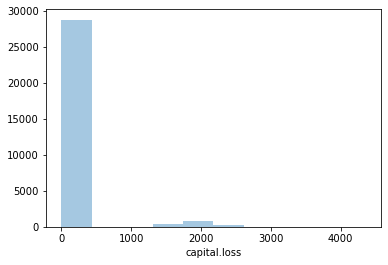

In [85]:
sns.distplot(data1['capital.loss'], kde=False, bins=10)

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

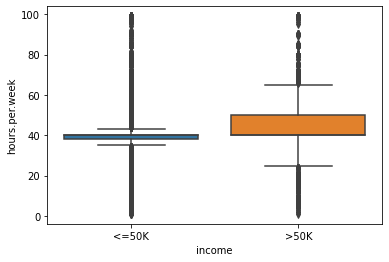

In [89]:
sns.boxplot(x=data1['income'], y=data1['hours.per.week'])

In [110]:
#reindexing income column to 0 and 1
data1['income']=data1['income'].map({'<=50K':0, '>50K':1})

<ipython-input-110-8ac4e63b7cae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['income']=data1['income'].map({'<=50K':0, '>50K':1})


In [113]:
data1.drop('salstat', axis=1, inplace=True)

KeyError: "['salstat'] not found in axis"

In [115]:
new_data=pd.get_dummies(data1, drop_first=True)#one-hot encoding

In [116]:
#storing columns names
col_list=list(new_data.columns)
print(col_list)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Never-married', 'marital.status_Separated', 'marital.status_Widowed', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv

In [120]:
#separating input names from list of columns
features=list(set(col_list)-set('income'))
print(features)

['marital.status_Married-AF-spouse', 'education_5th-6th', 'native.country_France', 'native.country_Scotland', 'native.country_Hungary', 'native.country_Yugoslavia', 'marital.status_Married-spouse-absent', 'workclass_Local-gov', 'native.country_Iran', 'native.country_Columbia', 'occupation_Transport-moving', 'education_Assoc-acdm', 'native.country_Ecuador', 'workclass_State-gov', 'occupation_Handlers-cleaners', 'education_9th', 'marital.status_Widowed', 'race_Asian-Pac-Islander', 'capital.gain', 'relationship_Wife', 'workclass_Self-emp-not-inc', 'native.country_Outlying-US(Guam-USVI-etc)', 'workclass_Self-emp-inc', 'occupation_Farming-fishing', 'native.country_Laos', 'relationship_Own-child', 'native.country_Guatemala', 'native.country_Ireland', 'native.country_Thailand', 'age', 'workclass_Private', 'native.country_Germany', 'native.country_Taiwan', 'education_Doctorate', 'occupation_Other-service', 'native.country_China', 'race_Black', 'native.country_South', 'native.country_Canada', '

In [121]:
#storing output values in y variable
y=new_data['income'].values
print(y)

[0 0 0 ... 1 0 0]


In [123]:
#storing values from input features
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [125]:
#split data into train and test set
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.3, random_state=0)

In [127]:
#make an instance of a model
logistics=LogisticRegression()

In [128]:
#fitting values for x and y
logistics.fit(train_x,train_y)

LogisticRegression()

In [129]:
#prediction from test data
pred=logistics.predict(test_x)

In [131]:
print(pred)

[1 0 0 ... 0 1 0]


In [132]:
#Confusion matrix
conf_mat=confusion_matrix(test_y,pred)

In [133]:
print(conf_mat)

[[6535  226]
 [1666  622]]


In [134]:
#calculate accuracy
acc=accuracy_score(test_y,pred)

In [135]:
print(acc)

0.7909161233285446


In [137]:
#print misclassified values
print("Misclassified values:%d"% (test_y!=pred).sum())

Misclassified values:1892


In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
import matplotlib.pyplot as plt

In [141]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)

In [142]:
knn_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [143]:
pred=knn_classifier.predict(test_x)

In [144]:
conf_mat=confusion_matrix(test_y,pred)

In [145]:
print(conf_mat)

[[6221  540]
 [1538  750]]


In [146]:
acc=accuracy_score(test_y,pred)

In [147]:
print(acc)

0.7703613658967842
